In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
# Read the dataset
diabetes = pd.read_csv("/content/gdrive/MyDrive/Thesis/Diabetes Dataset/diabetes_data_upload.csv")

In [ ]:
diabetes.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [ ]:
useful_features = [c for c in diabetes.columns if c not in ['class','kfold']]
len(useful_features)

16

In [ ]:
categorical_cols = [c for c in diabetes.columns if c not in ['class','kfold','Age']]
# df_test = df_test[useful_features]
len(categorical_cols)

15

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
print("Encoding")
ordinal_encoder = OrdinalEncoder()
diabetes[categorical_cols] = ordinal_encoder.fit_transform(diabetes[categorical_cols])
# xvalid[categorical_cols] = ordinal_encoder.transform(xvalid[categorical_cols])
# xtest[categorical_cols] = ordinal_encoder.transform(xtest[categorical_cols])

Encoding


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create the column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Age"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush",
                                              "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness",
                                              "Alopecia", "Obesity"])
)

# Create X & y
X = diabetes.drop("class", axis=1)
y = diabetes["class"]

# Building traning and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit column transformer on the training set
ct.fit(X_train)

# Transform training & test data with MinMaxScaler & One Hot Encoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train[:5]

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
225   29     1.0       0.0         0.0                 0.0       1.0   
94    36     0.0       1.0         1.0                 0.0       1.0   
462   57     1.0       0.0         0.0                 0.0       0.0   
284   72     1.0       1.0         0.0                 0.0       0.0   
23    48     1.0       0.0         1.0                 1.0       1.0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
225         0.0             0.0              0.0      0.0           0.0   
94          1.0             0.0              1.0      1.0           0.0   
462         1.0             0.0              1.0      0.0           0.0   
284         1.0             0.0              1.0      1.0           0.0   
23          0.0             0.0              1.0      1.0           1.0   

     delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
225              0.0              0.0               0.0       0.0      0.0  
94               1.0              1.0               0.0       0.0      0.0  
462              0.0              0.0               1.0       0.0      0.0  
284              1.0              1.0               1.0       1.0      0.0  
23               1.0              0.0               0.0       0.0      0.0

In [ ]:
X_train_normal.shape, y_train.shape

225    Negative
94     Positive
462    Negative
284    Negative
23     Positive
         ...   
71     Positive
106    Positive
270    Positive
435    Positive
102    Positive
Name: class, Length: 364, dtype: object

In [ ]:
def one_hot(array):
  one_hot_array = []
  for val in array:
    if val == "Positive":
      one_hot_array.append(1)
    else:
      one_hot_array.append(0)
  return one_hot_array

In [ ]:
y_train = np.array(one_hot(y_train))
y_test = np.array(one_hot(y_test))

In [ ]:
# Random seed for reproducibility
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(31, )),
  tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_1"),
  tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_2"),
  tf.keras.layers.Dense(8, activation="relu", name="hidden_layer_3"),
  tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
], name="Diabetes_Model")

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 6ms/step - loss: 0.3952 - accuracy: 0.8791
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1969 - accuracy: 0.9203
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1657 - accuracy: 0.9423
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1545 - accuracy: 0.9396
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1664 - accuracy: 0.9231
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1067 - accuracy: 0.9560
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0994 - accuracy: 0.9533
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0786 - accuracy: 0.9698
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0759 - accuracy: 0.9670
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0487 - accuracy: 0.9808
Epoch 11/

In [ ]:
model.fit(X_train_normal, y_train, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9945
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9945
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9945
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9945
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.9945
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0124 - accuracy: 0.9945
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.9945
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0141 - accuracy: 0.9945
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9945
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9945
Epoch 11/

In [ ]:
# Show model parameters
model.summary()

Model: "Diabetes_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 31)                0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                2048      
                                                                 
 hidden_layer_2 (Dense)      (None, 16)                1040      
                                                                 
 hidden_layer_3 (Dense)      (None, 8)                 136       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'Loss')

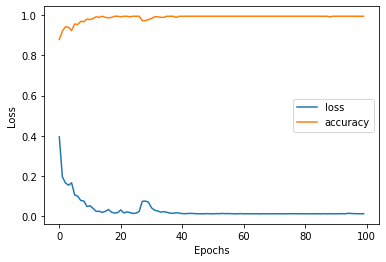

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
preds = model.predict(X_test_normal)
for i in range(len(preds)):
  if preds[i] >= 0.5:
    preds[i] =1
  else:
    preds[i] =0


In [ ]:
preds

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# conf_matrix = confusion_matrix(y_true=y_real, y_pred=preds1)
#
# Print the confusion matrix using Matplotlib
#
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

In [ ]:
acc = accuracy_score(y_test, preds)*100
print( f"Accuracy for the Model is {acc}%")
m

Accuracy for the Model is 97.43589743589743%
